In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/wafic/Downloads/data/my_say/QAID.csv')

In [3]:
data.head()

,user_id,q_9423,q_9328,q_9326,q_9431,q_9429,q_9435,q_9428,q_9434,q_9433,...,q_9327,q_9492,q_9486,q_9496,q_9620,q_9586,q_9474,q_9477,q_9476,q_9448
0,89,29239,0,0,29264,29258,29284,29253,29278,29276,...,0,0,0,0,0,0,0,0,0,0
1,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,29239,0,0,29268,29259,29284,29252,29278,29275,...,28937,0,0,0,0,0,0,0,0,0
3,183,29239,0,0,29268,29257,29285,29255,29278,29275,...,0,0,0,0,0,0,0,0,0,0
4,10109,29239,0,0,29268,29259,29281,29252,29278,29273,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(data.user_id)

4513

In [5]:
data.columns = data.columns.str.replace("q_", "").copy()

In [6]:
data.head(2)

,user_id,9423,9328,9326,9431,9429,9435,9428,9434,9433,...,9327,9492,9486,9496,9620,9586,9474,9477,9476,9448
0,89,29239,0,0,29264,29258,29284,29253,29278,29276,...,0,0,0,0,0,0,0,0,0,0
1,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_cat = pd.read_csv('/Users/wafic/Downloads/data/my_say/Questions_Categories.csv')

In [8]:
df_cat.question_id = df_cat.question_id.astype(str)

In [9]:
df_cat = df_cat[df_cat.question_id.isin(list(data.columns))].copy()

In [10]:
quest_list = list(df_cat[(df_cat.category_id == 1) | \
                         (df_cat.category_id == 2) | \
                         (df_cat.category_id == 3)].question_id)
len(quest_list)

75

In [11]:
data.set_index('user_id', inplace=True)

In [12]:
df = data[data.columns.intersection(quest_list)].copy()

In [13]:
for col in df.columns:
    df[col] = df[col].astype('category')

In [14]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes

In [15]:
for n, c in df.items():
    numericalize(df, c, n)

In [16]:
df.head()

,9423,9326,9362,9406,9425,9412,9509,9400,9515,9405,...,9532,9581,9411,9324,9382,9606,9496,9586,9474,9448
user_id,,,,,,,,,,,,,,,,,,,,,
89,3,0,1,1,1,4,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,3,0,1,2,1,4,2,2,3,1,...,0,0,0,2,0,0,0,0,0,0
183,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10109,3,0,2,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
encoded = pd.concat([pd.get_dummies(df[col], prefix=col) for col in df.columns], axis=1)

In [18]:
encoded.head()

,9423_0,9423_1,9423_2,9423_3,9326_0,9326_1,9326_2,9326_3,9362_0,9362_1,...,9586_1,9586_2,9586_3,9586_4,9474_0,9474_1,9474_2,9448_0,9448_1,9448_2
user_id,,,,,,,,,,,,,,,,,,,,,
89,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
107,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
173,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
183,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
10109,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


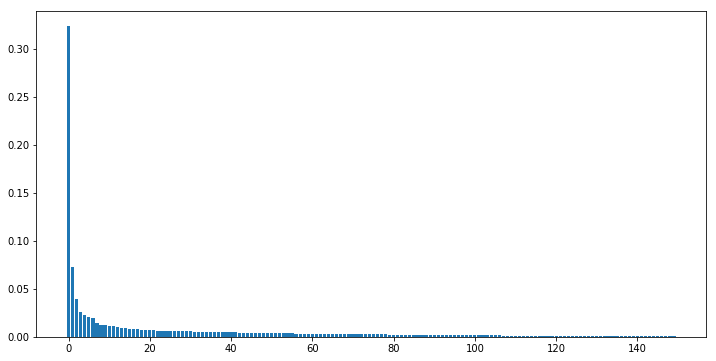

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
pca_fit = pca.fit(encoded)

p_comp =np.arange(len(pca_fit.explained_variance_ratio_))
var = pca_fit.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.bar(p_comp, var)
plt.show()

In [20]:
pca_fit.explained_variance_ratio_[:30].sum()

0.7168723245358166

In [21]:
# Perform PCA with 85 components
pca = PCA(n_components=30).fit(encoded)
df_pca = pca.transform(encoded)

In [22]:
df_pca.shape

(4513, 30)

In [23]:
def PC_W(df, n_comp):
    return pd.DataFrame(pca.components_[n_comp],index=df.columns, columns=['PC-'+str(n_comp+1)]).\
sort_values('PC-'+str(n_comp+1),ascending=False)

In [24]:
PC_W(encoded, 0).head()

,PC-1
9421_2,0.135760
9425_1,0.132741
9422_1,0.111344
9404_1,0.110057
9400_2,0.106592


In [25]:
PC_W(encoded, 0).tail()

,PC-1
9409_0,-0.157994
9401_0,-0.158064
9417_0,-0.158248
9402_0,-0.158434
9403_0,-0.158535


In [26]:
from sklearn.cluster import KMeans

cluster_dict = {}

clusters = [2, 3, 5, 8, 10, 12, 15, 30]

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster).fit(df_pca)
    
    score = abs(kmeans.score(df_pca))
    cluster_dict[cluster] = score
    print(cluster, "Cluster has score: ", score)

2 Cluster has score:  44698.0337168725
3 Cluster has score:  40318.316627220425
5 Cluster has score:  34447.51958792815
8 Cluster has score:  31390.23563482923
10 Cluster has score:  29996.332339744353
12 Cluster has score:  28672.830965407593
15 Cluster has score:  27551.89063159609
30 Cluster has score:  23558.669754853596


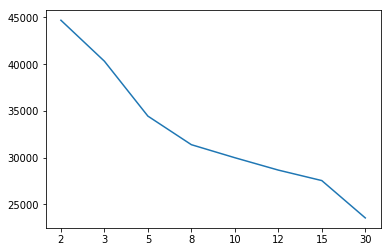

In [27]:
plt.plot(range(len(cluster_dict)), list(cluster_dict.values()))
plt.xticks(range(len(cluster_dict)), list(cluster_dict.keys()))
plt.show()

In [28]:
kmeans_10 = KMeans(10).fit(df_pca)
user_cluster = kmeans_10.predict(df_pca)

In [29]:
user_map = pd.DataFrame()
user_map['Users_ID'] = encoded.index.values
user_map['Clusters'] = user_cluster+1

In [30]:
user_map.head()

,Users_ID,Clusters
0,89,5
1,107,3
2,173,2
3,183,10
4,10109,6


In [34]:
user_map.to_csv('users_clusters.csv')

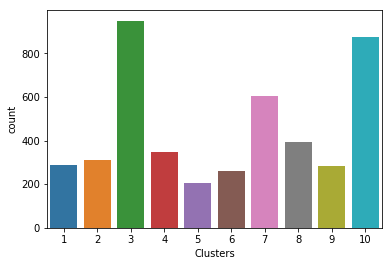

In [31]:
sns.countplot(user_map.Clusters)
plt.show()

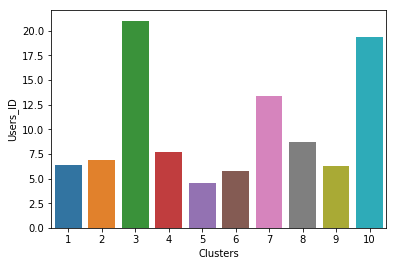

In [32]:
sns.barplot(x='Clusters', y='Users_ID', data=user_map, estimator=lambda x:len(x) / len(user_map)*100)
plt.show()

In [60]:
overrepresented = pca.inverse_transform(kmeans.cluster_centers_[9])
over_map = pd.DataFrame()
over_map['Features'] = encoded.columns
over_map['Values'] = overrepresented
over_map.sort_values('Values', ascending=False).head()

,Features,Values
266,9324_0,0.999588
287,9448_0,0.996562
284,9474_0,0.993380
279,9586_0,0.983524
204,9322_0,0.974166


In [61]:
over_map.to_csv('cluster_10.csv')